<br><font color = "#CC3D3D">
## Ensemble Learning ##

#### Data Preparation

In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # 경고메시지 숨기기
# 경고 메시지 다시보기 : warnings.filterwarnings(action='default')

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, random_state=0)

<font color = "#CC3D3D">
### Ensemble with different models

### 1. Voting ensemble

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC 

In [14]:
logreg = LogisticRegression()
svm = SVC(probability=True)
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
voting = VotingClassifier(
    estimators = [('svm', svm), ('tree', tree), ('knn', knn)],
    voting = 'hard')
# hard -> voting, soft -> averaging
# soft 방법이 일반적인 보팅방법

In [15]:
from sklearn.metrics import accuracy_score
for clf in (svm, tree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

SVC 0.9370629370629371
DecisionTreeClassifier 0.8741258741258742
KNeighborsClassifier 0.9370629370629371
VotingClassifier 0.9440559440559441


### Averaging predictions

In [16]:
averaging = VotingClassifier(
    estimators = [('svm', svm), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [17]:
averaging.fit(X_train, y_train).score(X_test, y_test)

0.9230769230769231

### 2. Stacking (많이 사용 안함)
- bagging과 boosting과는 달리 일반적으로 서로 다른 타입의 모델들을 결합하는데 사용

In [18]:
#!pip install mlxtend

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
svm = SVC()
mlp = MLPClassifier(alpha=1)

In [20]:
from mlxtend.classifier import StackingClassifier
import numpy as np
np.random.seed(1671)

stacking = StackingClassifier(classifiers=[tree, knn, svm, mlp], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (tree, knn, svm, mlp, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

DecisionTreeClassifier 0.9090909090909091
KNeighborsClassifier 0.9370629370629371
SVC 0.9370629370629371
MLPClassifier 0.9370629370629371
StackingClassifier 0.8951048951048951


### 3. Bagging
- Bootstrap Aggregating 의 줄임말
- 1. 데이터에서 여러개의 작은 데이터셋 N개로 샘플링(Bootstrapping)하고, 모델 N개로 학습. 
- 2. N개의 모델을 모두 하나로 합쳐서 최종적인 모델로 사용.(bag에 담는 느낌)
- (병렬적으로 데이터를 나누어 여러 개의 모델을 동시에 학습시킴)
<br>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb4wG8O%2FbtqyfYW98AS%2FYZBtUJy3jZLyuik1R0aGNk%2Fimg.png'/>

In [22]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0, n_estimators=200)
bagging.fit(X_train, y_train).score(X_test, y_test)

0.9370629370629371

### 4. Boosting
- 약한것들을 여러개 결합시켜 강한모델을 만들어 낸다는 의미.
- 편향을 줄이고 지도학습의 차이를 줄이기 위한 앙상블 메타 알고리즘
- 약한 학습모델을 강한 학습모델로 변환하는 기계학습 알고리즘 제품군
- AdaBoost(Adaptive Boosting)
- Gradient Boosting

부스팅은 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법입니다. <br>
배깅은 Deicison Tree1과 Decision Tree2가 서로 독립적으로 결과를 예측합니다. <br>
여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식입니다. <br>
하지만 부스팅은 모델 간 팀워크가 이루어집니다. 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 줍니다. <br>
잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복합니다.
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkCejr%2FbtqyghvqEZB%2F9o3rKTEsuSIDHEfelYFJlk%2Fimg.png'/>

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.986013986013986

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.965034965034965

<font color='#CC3D3D'>
### Performance evaluation of ensemble methods

C:\Users\028\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\028\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\028\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\028\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\028\anaconda3\lib\si

<AxesSubplot:>

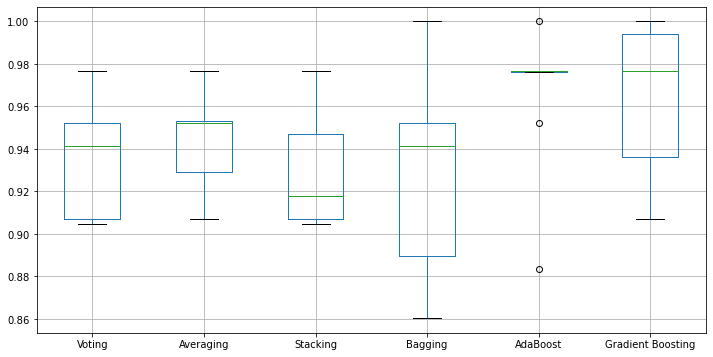

In [25]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Voting','Averaging','Stacking','Bagging','AdaBoost','Gradient Boosting']
models = [voting, averaging, stacking, bagging, ada, gbm]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()